Cost of training data: 3.4595819270340153


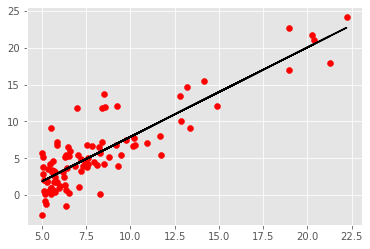

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

style.use('ggplot')
data = pd.read_csv("ex1data1.csv")
x2 = data.iloc[:,0]
y = data.iloc[:,-1]
alpha = 0.01
m = len(y)
theta = np.zeros(2)
iterations = 5000
lamda = 0.00
y = np.array(y).reshape(-1, 1)
X = np.array(x2).reshape(-1, 1)
x1 = np.ones(m).reshape(-1, 1)
X = np.concatenate((X, x1), axis = 1)

for i in range(1, iterations):
    hypo = np.sum(X*theta, axis = 1).reshape(-1, 1)
    theta = theta - alpha*(1/m * np.sum((hypo-y)*X, axis = 0)+(lamda/m)*theta)
    cost = (np.sum((hypo - y)**2) + lamda * np.sum(np.square(theta[1])))/(2*m)
print(f'Cost of training data: {cost}')
        
y_pred = np.sum(X*theta, axis = 1).reshape(-1, 1)
plt.scatter(x2, y, color ='r')
plt.plot(x2, y_pred, color = 'k')
plt.show()



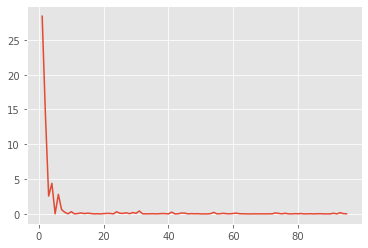

In [18]:

m_learn = np.arange(m)
m_learn = np.delete(m_learn, 0)
cost_learn = []
for v in m_learn:
    hypo = np.sum(X[v,:]*theta).reshape(-1, 1)
    cost_learn1 = np.sum((hypo - y[v,:])**2)*1/(2*v)
    cost_learn = np.concatenate((cost_learn, cost_learn1), axis = None)

    
plt.plot(m_learn, cost_learn)


In [16]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pickle

# importing data
df = pd.read_csv('ex1data2.csv')

# creating feature variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
#(X, y) = (x1.values, y.values)
y = np.array(y).reshape(-1, 1)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
np.set_printoptions(precision = 3)
scaler = StandardScaler().fit(y)
y = scaler.transform(y)
np.set_printoptions(precision = 3)

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=101)

# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

#saving my model as my_model
with open('my_model.pickle', 'wb') as f:
    pickle.dump(model, f)

#loading my model 
pickle_in = open('my_model.pickle','rb')
model = pickle.load(pickle_in)

# making predictions
predictions = model.predict(X_test)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

print('Coefficients : ', model.coef_)
print('intercept : ', model.intercept_)

mean_squared_error :  0.2872342023736014
mean_absolute_error :  0.45218386649096076
Coefficients :  [[ 0.969 -0.066]]
intercept :  [0.083]
